<a href="https://colab.research.google.com/github/diegoesquivel09/ejerciciosbsm/blob/main/moneyball.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nota inicial**.
Para ejecutar los modelos que hay al final de la hoja. Es necesario ejecutar primero esta casilla y luego reiniciar el proceso.

Después de ello se puede ejecutar todo usando la opción "Reiniciar y ejecutar todo" que hay en "Entorno de ejecución".

In [ ]:
!pip install mip

# Moneyball

<center>
    <h2>Descriptive analytics</h2>
    <hr>
</center>

In [ ]:
# Importar paquetes
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#vamos a eliminar algunos avisos molestos
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)



In [ ]:
# Importar datos
periodos = pd.read_csv("datos_periodos.csv")
jugadores = pd.read_csv("datos_jugadores.csv")

## Análisis exploratorio básico (i)

Veamos el número de periodos en la base de datos e información básica de los periodos


In [ ]:
print(periodos.dtypes)

id                   int64
local               object
visitante           object
minutos            float64
goles_local          int64
goles_visitante      int64
local1              object
local2              object
local3              object
local4              object
visitante1          object
visitante2          object
visitante3          object
visitante4          object
dtype: object


In [ ]:
print(periodos.head())

   id local visitante   minutos  goles_local  goles_visitante  local1  local2  \
0   1   USA     Japon  4.252969            4                9  USA_p4  USA_p1   
1   1   USA     Japon  5.688809            6               11  USA_p1  USA_p7   
2   1   USA     Japon  1.149557            0                1  USA_p8  USA_p1   
3   1   USA     Japon  3.511617            7                5  USA_p2  USA_p7   
4   1   USA     Japon  2.163139            7                5  USA_p9  USA_p5   

   local3  local4 visitante1 visitante2 visitante3 visitante4  
0  USA_p3  USA_p6  Japon_p12   Japon_p4   Japon_p8   Japon_p6  
1  USA_p6  USA_p5   Japon_p7  Japon_p10   Japon_p8  Japon_p12  
2  USA_p4  USA_p5   Japon_p5   Japon_p3   Japon_p7  Japon_p10  
3  USA_p8  USA_p6   Japon_p2   Japon_p4  Japon_p10  Japon_p12  
4  USA_p8  USA_p7   Japon_p8   Japon_p6  Japon_p10   Japon_p1  


In [ ]:
print("Número de periodos:", len(periodos))

Número de periodos: 7448


In [ ]:
print(jugadores.head())

  jugador  rating
0  USA_p1     3.0
1  USA_p2     3.0
2  USA_p3     3.5
3  USA_p4     0.0
4  USA_p5     2.0


In [ ]:
print(periodos.describe())

                id      minutos  goles_local  goles_visitante
count  7448.000000  7448.000000  7448.000000      7448.000000
mean    329.022019     2.843314     4.494898         4.253088
std     191.181579     1.631194     3.548051         3.411053
min       1.000000     0.001582     0.000000         0.000000
25%     162.750000     1.622875     2.000000         2.000000
50%     329.000000     2.582959     4.000000         3.000000
75%     495.000000     3.765502     6.000000         6.000000
max     660.000000     8.000000    24.000000        23.000000


## Análisis exploratorio básico (ii)

Intentemos ver cuántos periodos juega cada equpo. Para ello voy a necesitar hacer algunas transformaciones en la base de datos

In [ ]:
# Group by local team and count
local_count = periodos.groupby('local').size().reset_index(name='periodos')
local_count = local_count.rename(columns={'local': 'equipo'})

# Group by visitante team and count
visitante_count = periodos.groupby('visitante').size().reset_index(name='periodos')
visitante_count = visitante_count.rename(columns={'visitante': 'equipo'})

# Concatenate results and group by 'equipo' to get total count
contar_periodos = pd.concat([local_count, visitante_count])
contar_periodos = contar_periodos.groupby('equipo').sum().reset_index()

print(contar_periodos)

          equipo  periodos
0         Brasil      1224
1         Canada      1263
2          China      1251
3      Dinamarca      1242
4         Espana      1257
5        Francia      1217
6   Gran.Bretana      1218
7          Japon      1261
8      Marruecos      1224
9        Polonia      1260
10        Suecia      1250
11           USA      1229


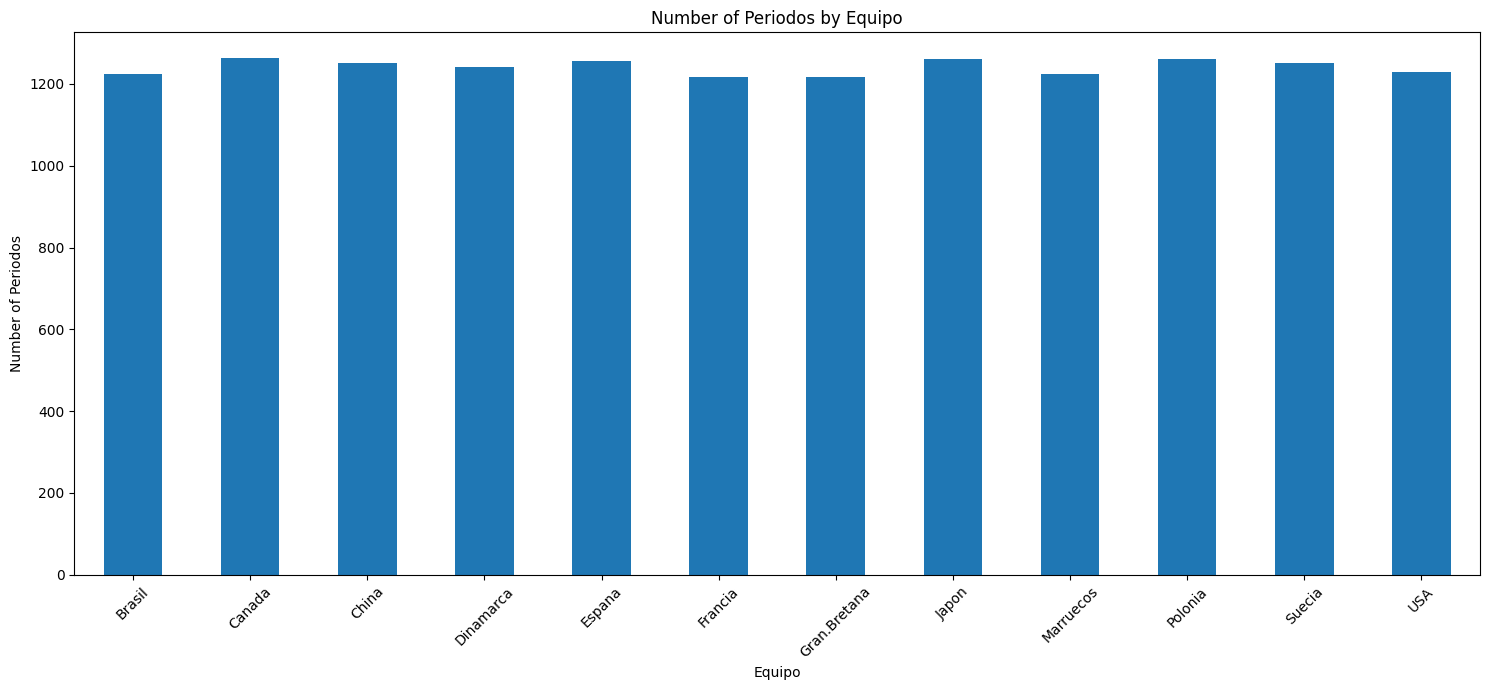

In [ ]:
# Hacer un histograma
contar_periodos.plot(kind='bar', x='equipo', y='periodos', figsize=(15, 7), legend=False)

plt.title("Number of Periodos by Equipo")
plt.xlabel("Equipo")
plt.ylabel("Number of Periodos")
plt.xticks(rotation=45)
plt.tight_layout()


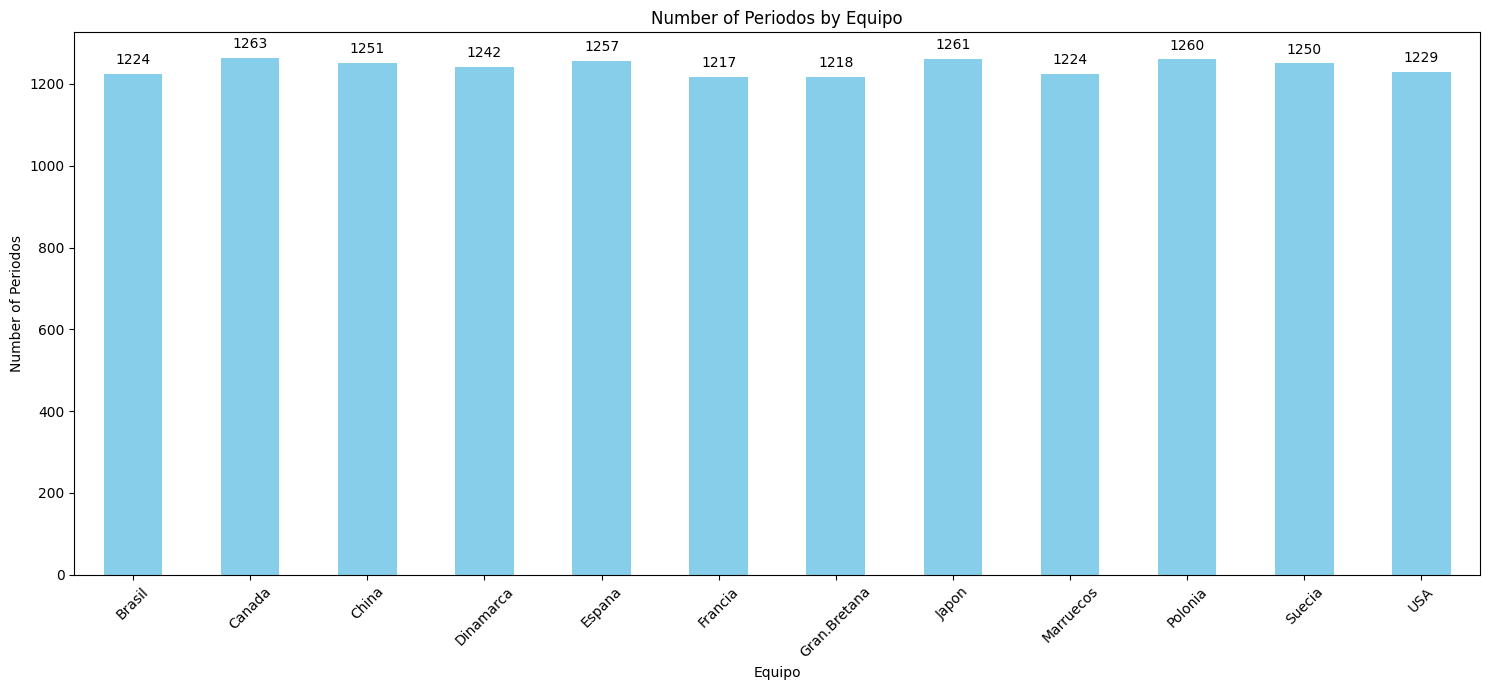

In [ ]:
# Pongamos algo más de información para facilitar la lectura
ax = contar_periodos.plot(kind='bar', x='equipo', y='periodos', figsize=(15, 7), legend=False, color='skyblue')

plt.title("Number of Periodos by Equipo")
plt.xlabel("Equipo")
plt.ylabel("Number of Periodos")
plt.xticks(rotation=45)

# Annotating each bar with its height
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()

## Análisis exploratorio básico (iii)

Centremos el mismo estudio sólo en el caso de España, ya que es el grupo de interés principal

In [ ]:
# Filter and count rows where 'local' is 'Espana'
local_espana = periodos[periodos['local'] == 'Espana']
local_count = local_espana.groupby('visitante').size().reset_index(name='periodos')
local_count = local_count.rename(columns={'visitante': 'equipo'})

# Filter and count rows where 'visitante' is 'Espana'
visitante_espana = periodos[periodos['visitante'] == 'Espana']
visitante_count = visitante_espana.groupby('local').size().reset_index(name='periodos')
visitante_count = visitante_count.rename(columns={'local': 'equipo'})

# Concatenate results and sum by 'equipo'
contar_periodos = pd.concat([local_count, visitante_count])
contar_periodos = contar_periodos.groupby('equipo').sum().reset_index()

print(contar_periodos)

          equipo  periodos
0         Brasil       113
1         Canada       112
2          China       113
3      Dinamarca       117
4        Francia       111
5   Gran.Bretana       110
6          Japon       122
7      Marruecos       110
8        Polonia       117
9         Suecia       119
10           USA       113


              periodos
equipo                
Brasil             113
Canada             112
China              113
Dinamarca          117
Francia            111
Gran.Bretana       110
Japon              122
Marruecos          110
Polonia            117
Suecia             119
USA                113


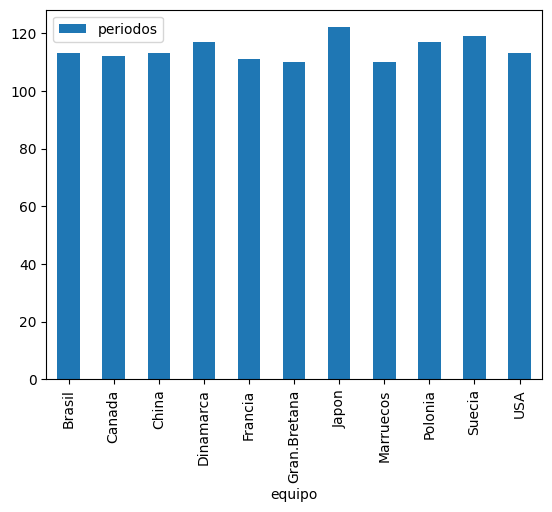

In [ ]:
#hagamos un histograma (usando la versión propia)
contar_periodos.set_index("equipo", inplace=True)
print(contar_periodos)
contar_periodos.plot(kind='bar')
plt.xlabel("equipo")
plt.xticks(rotation=90)  # Rotar etiquetas para facilitar lectura
plt.show()


## Analisi exploratorio básico (iv)

Estudiemos ahora a los jugadores y sus ratings

In [ ]:
print(jugadores.head())

  jugador  rating
0  USA_p1     3.0
1  USA_p2     3.0
2  USA_p3     3.5
3  USA_p4     0.0
4  USA_p5     2.0


In [ ]:
print(jugadores['rating'].describe())

count    144.000000
mean       1.979167
std        1.010219
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        3.500000
Name: rating, dtype: float64


In [ ]:
jugadores['ratingCategoria']=jugadores['rating'].astype('category')
print(jugadores.dtypes)
print(jugadores['ratingCategoria'].unique())


jugador              object
rating              float64
ratingCategoria    category
dtype: object
[3.0, 3.5, 0.0, 2.0, 0.5, 1.5, 2.5, 1.0]
Categories (8, float64): [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5]


In [ ]:
contarRating = jugadores.groupby('ratingCategoria')['jugador'].count()
print(contarRating)

ratingCategoria
0.0     6
0.5    14
1.0    20
1.5    14
2.0    37
2.5     8
3.0    29
3.5    16
Name: jugador, dtype: int64


In [ ]:
contarRating = jugadores.groupby('ratingCategoria').size().reset_index(name='count')
print(contarRating)

  ratingCategoria  count
0             0.0      6
1             0.5     14
2             1.0     20
3             1.5     14
4             2.0     37
5             2.5      8
6             3.0     29
7             3.5     16


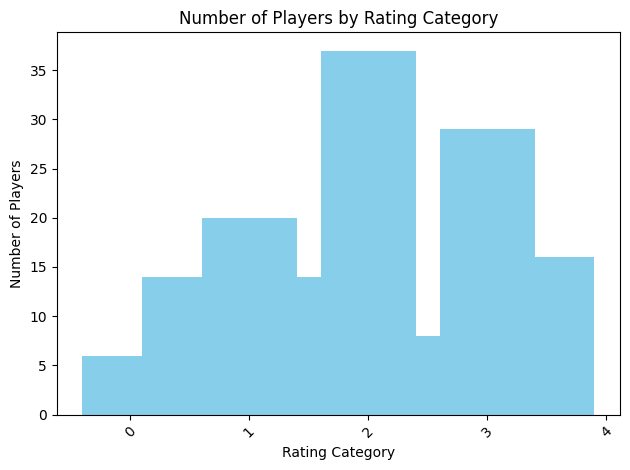

In [ ]:
plt.bar(contarRating['ratingCategoria'], contarRating['count'], color='skyblue')
plt.title("Number of Players by Rating Category")
plt.xlabel("Rating Category")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.tight_layout()


(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7')])

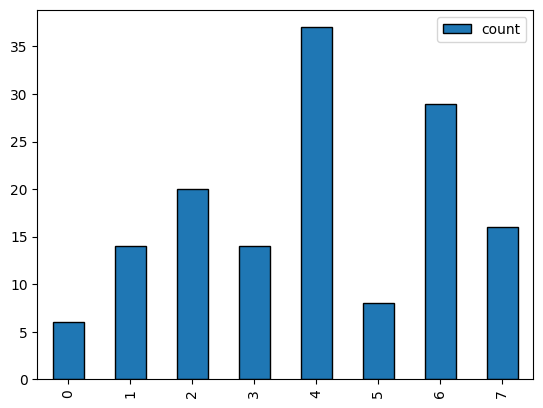

In [ ]:
contarRating.plot(kind='bar', edgecolor='black')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability


## Analisi exploratorio básico (v)

Identificar a los jugadores con su país

In [ ]:
jugadores['equipo']=jugadores['jugador'].str.split('_').str[0]
print(jugadores)
#chatgpt recomienda exactamente este código

       jugador  rating ratingCategoria equipo
0       USA_p1     3.0             3.0    USA
1       USA_p2     3.0             3.0    USA
2       USA_p3     3.5             3.5    USA
3       USA_p4     0.0             0.0    USA
4       USA_p5     2.0             2.0    USA
..         ...     ...             ...    ...
139   China_p8     2.0             2.0  China
140   China_p9     0.5             0.5  China
141  China_p10     0.5             0.5  China
142  China_p11     0.0             0.0  China
143  China_p12     1.0             1.0  China

[144 rows x 4 columns]


## Análisi exploratorio básico (vi)

- Estadísticos de los partidos (goles promedio por partido)

- Margen medio de victoria

Esta información la guardaremos en un nuevo dataframe y muestra la necesidad de tomar pasos intermedios en ocasiones

In [ ]:
goles_pp = periodos.groupby('id').agg({
    'minutos': 'sum',
    'goles_local': 'sum',
    'goles_visitante': 'sum'
}).reset_index()

# Create the 'goles' column
goles_pp['goles'] = goles_pp['goles_local'] + goles_pp['goles_visitante']
# Describe the aggregated columns
description = goles_pp[['minutos', 'goles_local', 'goles_visitante', 'goles']].describe()
print(description)

          minutos  goles_local  goles_visitante       goles
count  660.000000   660.000000       660.000000  660.000000
mean    32.086364    50.724242        47.995455   98.719697
std      0.577890    10.965099        10.892842   13.086333
min     32.000000    21.000000        17.000000   63.000000
25%     32.000000    43.000000        41.000000   89.000000
50%     32.000000    51.000000        48.000000   98.000000
75%     32.000000    58.000000        55.000000  107.000000
max     38.000000    84.000000        81.000000  141.000000


In [ ]:
goles_pp['dif_goles'] = abs(goles_pp['goles_local'] - goles_pp['goles_visitante'])
print(goles_pp)

      id  minutos  goles_local  goles_visitante  goles  dif_goles
0      1     32.0           42               63    105         21
1      2     32.0           45               42     87          3
2      3     32.0           46               28     74         18
3      4     32.0           52               33     85         19
4      5     32.0           41               53     94         12
..   ...      ...          ...              ...    ...        ...
655  656     32.0           63               51    114         12
656  657     32.0           52               67    119         15
657  658     32.0           54               55    109          1
658  659     32.0           51               61    112         10
659  660     32.0           53               59    112          6

[660 rows x 6 columns]


## Análisi exploratorio básico (vii)

- Victorias y derrotas de cada equipo

- Promedio plus-minus

Nótese que aquí ya hemos encarado la decisión de analizar plus-minus como descriptor del efecto de un jugador

In [ ]:
# Group by 'id' and aggregate the required columns
goles_pp = periodos.groupby('id').agg({
    'minutos': 'sum',
    'goles_local': 'sum',
    'goles_visitante': 'sum',
    'local': 'first',  # Taking the first (or any) entry for 'local'
    'visitante': 'first'  # Taking the first (or any) entry for 'visitante'
}).reset_index()

# Calculate 'goles' and 'dif_goles' columns
goles_pp['goles'] = goles_pp['goles_local'] + goles_pp['goles_visitante']
goles_pp['dif_goles'] = abs(goles_pp['goles_local'] - goles_pp['goles_visitante'])

# Print the head of the dataframe
print(goles_pp.head())

   id  minutos  goles_local  goles_visitante local     visitante  goles  \
0   1     32.0           42               63   USA         Japon    105   
1   2     32.0           45               42   USA  Gran.Bretana     87   
2   3     32.0           46               28   USA        Canada     74   
3   4     32.0           52               33   USA       Francia     85   
4   5     32.0           41               53   USA     Dinamarca     94   

   dif_goles  
0         21  
1          3  
2         18  
3         19  
4         12  


In [ ]:
# Helper function to calculate victorias
def calculate_victorias(df, equipo):
    victorias_as_local = df[(df['local'] == equipo) & (df['goles_local'] > df['goles_visitante'])].shape[0]
    victorias_as_visitante = df[(df['visitante'] == equipo) & (df['goles_visitante'] > df['goles_local'])].shape[0]
    return victorias_as_local + victorias_as_visitante

# Helper function to calculate derrotas
def calculate_derrotas(df, equipo):
    derrotas_as_local = df[(df['local'] == equipo) & (df['goles_local'] < df['goles_visitante'])].shape[0]
    derrotas_as_visitante = df[(df['visitante'] == equipo) & (df['goles_visitante'] < df['goles_local'])].shape[0]
    return derrotas_as_local + derrotas_as_visitante

# Helper function to calculate partidos
def calculate_partidos(df, equipo):
    return df[(df['local'] == equipo) | (df['visitante'] == equipo)].shape[0]

# Helper function to calculate plus_minus_acumulado
def calculate_plus_minus_acumulado(df, equipo):
    plus_as_local = (df[df['local'] == equipo]['goles_local'] - df[df['local'] == equipo]['goles_visitante']).sum()
    plus_as_visitante = (df[df['visitante'] == equipo]['goles_visitante'] - df[df['visitante'] == equipo]['goles_local']).sum()
    return plus_as_local + plus_as_visitante

# List of unique equipos
equipos = pd.concat([goles_pp['local'], goles_pp['visitante']]).unique()

# Calculate values for the 'resultados' dataframe
data = []
for equipo in equipos:
    victorias = calculate_victorias(goles_pp, equipo)
    derrotas = calculate_derrotas(goles_pp, equipo)
    partidos = calculate_partidos(goles_pp, equipo)
    plus_minus_acumulado = calculate_plus_minus_acumulado(goles_pp, equipo)
    plus_minus_promedio = plus_minus_acumulado / partidos if partidos != 0 else 0

    data.append([equipo, victorias, derrotas, partidos, plus_minus_acumulado, plus_minus_promedio])

# Create the 'resultados' dataframe
resultados = pd.DataFrame(data, columns=['equipo', 'victorias', 'derrotas', 'partidos', 'plus_minus_acumulado', 'plus_minus_promedio'])

print(resultados.T)

                             0      1             2         3         4   \
equipo                      USA  Japon  Gran.Bretana    Canada   Francia   
victorias                    78     91            67        77        70   
derrotas                     32     19            43        33        40   
partidos                    110    110           110       110       110   
plus_minus_acumulado       1138   1595           599       822       549   
plus_minus_promedio   10.345455   14.5      5.445455  7.472727  4.990909   

                             5          6         7         8         9   \
equipo                Dinamarca     Suecia    Brasil    Espana   Polonia   
victorias                    57         11        60        54        63   
derrotas                     53         99        50        56        47   
partidos                    110        110       110       110       110   
plus_minus_acumulado        132      -1862       174       -17       225   
plus_minus_

## Análisi exploratorio básico (viii)

- ¿El local gana con más frecuencia?

- ¿Cuál es la diferencia cuando gana el local y cuando gana el visitante?

Saber si hay una diferencia entre local y visitante nos permitirá definir qué modelo predictivo usar

In [ ]:
# Counting the number of rows where goles_local > goles_visitante
local_wins = goles_pp[goles_pp['goles_local'] > goles_pp['goles_visitante']].shape[0]

# Counting the number of rows where goles_visitante > goles_local
visitante_wins = goles_pp[goles_pp['goles_visitante'] > goles_pp['goles_local']].shape[0]

print("gana local:",local_wins)
print("gana visitante:",visitante_wins)

gana local: 375
gana visitante: 285


In [ ]:
# Descriptive statistics for dif_goles where goles_local > goles_visitante
local_wins_stats = goles_pp[goles_pp['goles_local'] > goles_pp['goles_visitante']]['dif_goles'].describe()

# Descriptive statistics for dif_goles where goles_visitante > goles_local
visitante_wins_stats = goles_pp[goles_pp['goles_visitante'] > goles_pp['goles_local']]['dif_goles'].describe()

print("Descriptive statistics for dif_goles (goles_local > goles_visitante):\n", local_wins_stats)
print("\nDescriptive statistics for dif_goles (goles_visitante > goles_local):\n", visitante_wins_stats)

Descriptive statistics for dif_goles (goles_local > goles_visitante):
 count    375.000000
mean      14.962667
std       10.925058
min        1.000000
25%        6.000000
50%       12.000000
75%       22.000000
max       51.000000
Name: dif_goles, dtype: float64

Descriptive statistics for dif_goles (goles_visitante > goles_local):
 count    285.000000
mean      13.368421
std        9.819554
min        1.000000
25%        5.000000
50%       11.000000
75%       19.000000
max       47.000000
Name: dif_goles, dtype: float64


## Análisi exploratorio básico (ix)

Cuál es el plus-minus de cada jugador y cuál es el mejor jugador de cada equipo

In [ ]:
# Add 'local_plus_minus' column
periodos['local_plus_minus'] = periodos['goles_local'] - periodos['goles_visitante']
# Add 'visitante_plus_minus' column
periodos['visitante_plus_minus'] = periodos['goles_visitante'] - periodos['goles_local']

print(periodos.head())

   id local visitante   minutos  goles_local  goles_visitante  local1  local2  \
0   1   USA     Japon  4.252969            4                9  USA_p4  USA_p1   
1   1   USA     Japon  5.688809            6               11  USA_p1  USA_p7   
2   1   USA     Japon  1.149557            0                1  USA_p8  USA_p1   
3   1   USA     Japon  3.511617            7                5  USA_p2  USA_p7   
4   1   USA     Japon  2.163139            7                5  USA_p9  USA_p5   

   local3  local4 visitante1 visitante2 visitante3 visitante4  \
0  USA_p3  USA_p6  Japon_p12   Japon_p4   Japon_p8   Japon_p6   
1  USA_p6  USA_p5   Japon_p7  Japon_p10   Japon_p8  Japon_p12   
2  USA_p4  USA_p5   Japon_p5   Japon_p3   Japon_p7  Japon_p10   
3  USA_p8  USA_p6   Japon_p2   Japon_p4  Japon_p10  Japon_p12   
4  USA_p8  USA_p7   Japon_p8   Japon_p6  Japon_p10   Japon_p1   

   local_plus_minus  visitante_plus_minus  
0                -5                     5  
1                -5               

In [ ]:
# Calculate 'minutos' column for 'jugadores'
jugadores['minutos'] = jugadores['jugador'].apply(
    lambda x: periodos.loc[periodos[['local1', 'local2', 'local3', 'local4', 'visitante1', 'visitante2', 'visitante3', 'visitante4']].eq(x).any(axis=1), 'minutos'].sum()
)

# Calculate 'plus_minus' column for 'jugadores'
def calculate_plus_minus(player):
    # Calculate based on local columns
    plus_local = periodos[periodos[['local1', 'local2', 'local3', 'local4']].eq(player).any(axis=1)]['goles_local'].sum()
    minus_local = periodos[periodos[['local1', 'local2', 'local3', 'local4']].eq(player).any(axis=1)]['goles_visitante'].sum()

    # Calculate based on visitante columns
    plus_visitante = periodos[periodos[['visitante1', 'visitante2', 'visitante3', 'visitante4']].eq(player).any(axis=1)]['goles_visitante'].sum()
    minus_visitante = periodos[periodos[['visitante1', 'visitante2', 'visitante3', 'visitante4']].eq(player).any(axis=1)]['goles_local'].sum()

    return (plus_local - minus_local) + (plus_visitante - minus_visitante)

jugadores['plus_minus'] = jugadores['jugador'].apply(calculate_plus_minus)
print(jugadores.head(12))

    jugador  rating ratingCategoria equipo      minutos  plus_minus
0    USA_p1     3.0             3.0    USA  1155.774143         458
1    USA_p2     3.0             3.0    USA  1067.953325          65
2    USA_p3     3.5             3.5    USA   888.478357         265
3    USA_p4     0.0             0.0    USA  1421.401843          94
4    USA_p5     2.0             2.0    USA  1039.289768         250
5    USA_p6     0.5             0.5    USA  1371.410543         614
6    USA_p7     1.5             1.5    USA  1365.531145         716
7    USA_p8     2.5             2.5    USA  1189.860930         639
8    USA_p9     1.0             1.0    USA  1350.456526         619
9   USA_p10     1.0             1.0    USA  1306.934827         233
10  USA_p11     3.5             3.5    USA   899.800906         218
11  USA_p12     3.0             3.0    USA  1047.107687         381


In [ ]:
jugadores['plus_minus_minuto']=jugadores['plus_minus']/jugadores['minutos']

In [ ]:
print(jugadores)

       jugador  rating ratingCategoria equipo      minutos  plus_minus  \
0       USA_p1     3.0             3.0    USA  1155.774143         458   
1       USA_p2     3.0             3.0    USA  1067.953325          65   
2       USA_p3     3.5             3.5    USA   888.478357         265   
3       USA_p4     0.0             0.0    USA  1421.401843          94   
4       USA_p5     2.0             2.0    USA  1039.289768         250   
..         ...     ...             ...    ...          ...         ...   
139   China_p8     2.0             2.0  China  1279.232553        -592   
140   China_p9     0.5             0.5  China   568.122684        -179   
141  China_p10     0.5             0.5  China   583.832171        -424   
142  China_p11     0.0             0.0  China   730.248998        -234   
143  China_p12     1.0             1.0  China  1214.929174        -217   

     plus_minus_minuto  
0             0.396271  
1             0.060864  
2             0.298263  
3          

In [ ]:
# Find player with maximum 'plus_minus' for each 'equipo'
max_plus_minus_players = jugadores.loc[jugadores.groupby('equipo')['plus_minus'].idxmax()]

# Find player with maximum 'plus_minus_minuto' for each 'equipo'
max_plus_minus_minuto_players = jugadores.loc[jugadores.groupby('equipo')['plus_minus_minuto'].idxmax()]

print("Players with maximum 'plus_minus' for each 'equipo':")
print(max_plus_minus_players[['equipo', 'jugador', 'plus_minus']])

print("\nPlayers with maximum 'plus_minus_minuto' for each 'equipo':")
print(max_plus_minus_minuto_players[['equipo', 'jugador', 'plus_minus_minuto']])


Players with maximum 'plus_minus' for each 'equipo':
           equipo           jugador  plus_minus
84         Brasil         Brasil_p1         573
37         Canada         Canada_p2         689
140         China          China_p9        -179
67      Dinamarca      Dinamarca_p8         292
98         Espana         Espana_p3         289
50        Francia        Francia_p3         583
34   Gran.Bretana  Gran.Bretana_p11         370
12          Japon          Japon_p1         961
127     Marruecos      Marruecos_p8        -424
108       Polonia        Polonia_p1         265
80         Suecia         Suecia_p9        -237
6             USA            USA_p7         716

Players with maximum 'plus_minus_minuto' for each 'equipo':
           equipo          jugador  plus_minus_minuto
84         Brasil        Brasil_p1           0.429499
44         Canada        Canada_p9           0.488359
143         China        China_p12          -0.178611
67      Dinamarca     Dinamarca_p8           0

## Análisi exploratorio básico (x)

¿Existe correlación entre calidad de jugadores y rating físico?

In [ ]:
correlation = jugadores['rating'].corr(jugadores['plus_minus_minuto'])

print("Correlation between 'rating' and 'plus_minus_minuto':", correlation)


Correlation between 'rating' and 'plus_minus_minuto': 0.0860131169727592


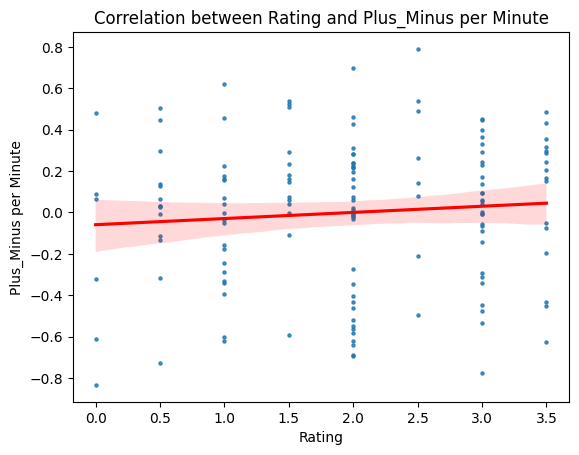

Slope: 0.029745941503934666
Intercept: -0.059397950298064675


In [ ]:
from scipy.stats import linregress

# Create a scatter plot with a regression line
sns.regplot(x='rating', y='plus_minus_minuto', data=jugadores, scatter_kws={'s': 5}, line_kws={'color': 'red'})

# Title and labels
plt.title('Correlation between Rating and Plus_Minus per Minute')
plt.xlabel('Rating')
plt.ylabel('Plus_Minus per Minute')

# Display the plot
plt.show()

# Calculate the slope and intercept of the regression line
slope, intercept, _, _, _ = linregress(jugadores['rating'], jugadores['plus_minus_minuto'])

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")


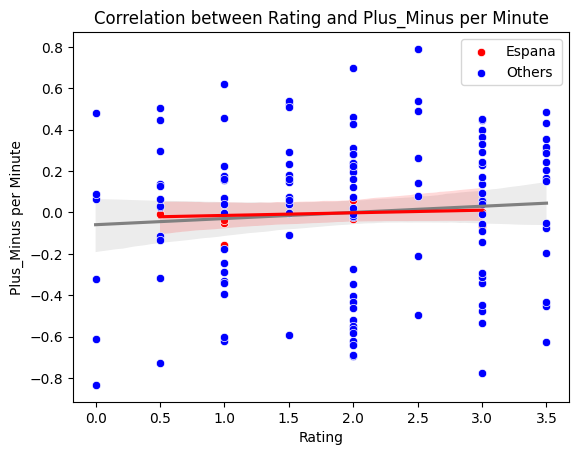

In [ ]:
# Dataframes for 'Espana' and 'Others'
espana_df = jugadores[jugadores['equipo'] == 'Espana']
others_df = jugadores[jugadores['equipo'] != 'Espana']

# Regression line for the entire dataset
sns.regplot(x='rating', y='plus_minus_minuto', data=jugadores, scatter=False, line_kws={'color': 'gray'})

# Regression line for 'Espana'
sns.regplot(x='rating', y='plus_minus_minuto', data=espana_df, scatter=False, line_kws={'color': 'red'})

# Scatter plots for 'Espana' (red) and 'Others' (blue)
sns.scatterplot(x='rating', y='plus_minus_minuto', data=espana_df, color='red', label='Espana')
sns.scatterplot(x='rating', y='plus_minus_minuto', data=others_df, color='blue', label='Others')

# Title and labels
plt.title('Correlation between Rating and Plus_Minus per Minute')
plt.xlabel('Rating')
plt.ylabel('Plus_Minus per Minute')
plt.legend()


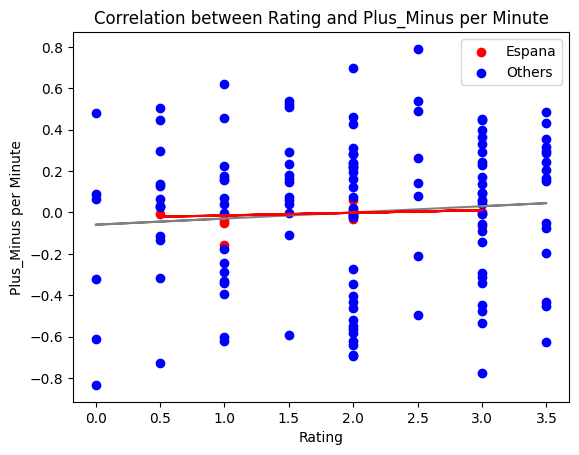

Regression (All): Slope = 0.02974594150393465, Intercept = -0.05939795029806464
Regression (Espana): Slope = 0.01269980266947995, Intercept = -0.027301092194553744


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Separate the data
espana_data = jugadores[jugadores['equipo'] == 'Espana']
others_data = jugadores[jugadores['equipo'] != 'Espana']

# Compute the regression for the entire data
coefficients_all = np.polyfit(jugadores['rating'], jugadores['plus_minus_minuto'], 1)
slope_all, intercept_all = coefficients_all

# Compute the regression for 'Espana'
coefficients_espana = np.polyfit(espana_data['rating'], espana_data['plus_minus_minuto'], 1)
slope_espana, intercept_espana = coefficients_espana

# Plotting the scatter plot for 'Espana' (red) and 'Others' (blue)
plt.scatter(espana_data['rating'], espana_data['plus_minus_minuto'], color='red', label='Espana')
plt.scatter(others_data['rating'], others_data['plus_minus_minuto'], color='blue', label='Others')

# Plotting the regression lines
plt.plot(jugadores['rating'], slope_all * jugadores['rating'] + intercept_all, color='gray')
plt.plot(espana_data['rating'], slope_espana * espana_data['rating'] + intercept_espana, color='red')

# Setting labels and title
plt.title('Correlation between Rating and Plus_Minus per Minute')
plt.xlabel('Rating')
plt.ylabel('Plus_Minus per Minute')
plt.legend()

# Displaying the plot
plt.show()

# Print the slope and intercept for each regression
print(f"Regression (All): Slope = {slope_all}, Intercept = {intercept_all}")
print(f"Regression (Espana): Slope = {slope_espana}, Intercept = {intercept_espana}")

## Análisi exploratorio básico (xi)

Relación plus-minus por equipo

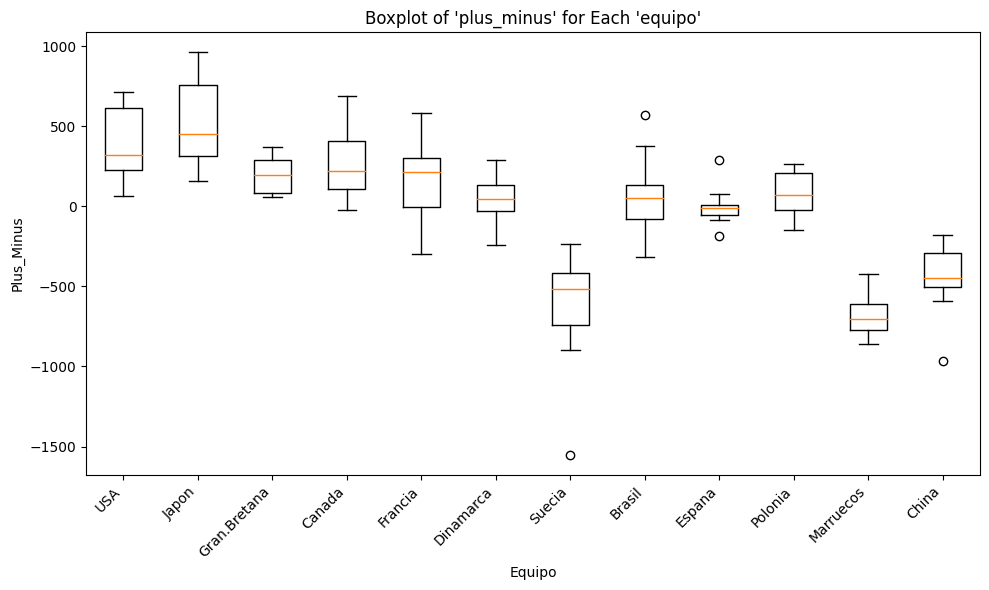

In [ ]:
import matplotlib.pyplot as plt

# List of unique 'equipo' values
teams = jugadores['equipo'].unique()

# List of 'plus_minus' values for each 'equipo'
data = [jugadores[jugadores['equipo'] == team]['plus_minus'].values for team in teams]

# Create the boxplot
fig, ax = plt.subplots(figsize=(10, 6))
ax.boxplot(data)
ax.set_xticks(range(1, len(teams) + 1))
ax.set_xticklabels(teams, rotation=45, ha='right')
ax.set_title("Boxplot of 'plus_minus' for Each 'equipo'")
ax.set_ylabel('Plus_Minus')
ax.set_xlabel('Equipo')

# Display the plot
plt.tight_layout()

In [ ]:
summary = jugadores.groupby('equipo')['plus_minus'].describe()
print(summary)

              count        mean         std     min     25%    50%     75%  \
equipo                                                                       
Brasil         12.0   58.000000  243.548017  -314.0  -80.00   49.5  132.25   
Canada         12.0  274.000000  232.384869   -24.0  109.00  219.0  407.00   
China          12.0 -441.000000  212.295249  -967.0 -501.50 -446.5 -294.00   
Dinamarca      12.0   44.000000  155.926556  -240.0  -29.00   46.0  131.25   
Espana         12.0   -5.666667  112.851740  -187.0  -51.75  -12.0    6.25   
Francia        12.0  183.000000  247.606726  -296.0   -2.00  216.5  304.25   
Gran.Bretana   12.0  199.666667  118.787307    56.0   85.75  193.0  290.00   
Japon          12.0  531.666667  285.866254   157.0  312.75  454.0  757.25   
Marruecos      12.0 -677.333333  138.770794  -860.0 -770.50 -703.5 -608.00   
Polonia        12.0   75.000000  149.635314  -150.0  -22.00   70.0  207.00   
Suecia         12.0 -620.666667  357.226267 -1551.0 -742.75 -518

## Análisi exploratorio básico (xii)

Relación plus-minus con la suma de rating de los jugadores en pista

In [ ]:
# Create a mapping of jugador to rating
rating_map = dict(zip(jugadores['jugador'], jugadores['rating']))

# Calculate rating_local
periodos['rating_local'] = periodos[['local1', 'local2', 'local3', 'local4']].apply(lambda row: sum([rating_map.get(player, 0) for player in row]), axis=1)

# Calculate rating_visitante
periodos['rating_visitante'] = periodos[['visitante1', 'visitante2', 'visitante3', 'visitante4']].apply(lambda row: sum([rating_map.get(player, 0) for player in row]), axis=1)


In [ ]:
print(periodos.head(1))

   id local visitante   minutos  goles_local  goles_visitante  local1  local2  \
0   1   USA     Japon  4.252969            4                9  USA_p4  USA_p1   

   local3  local4 visitante1 visitante2 visitante3 visitante4  \
0  USA_p3  USA_p6  Japon_p12   Japon_p4   Japon_p8   Japon_p6   

   local_plus_minus  visitante_plus_minus  rating_local  rating_visitante  
0                -5                     5           7.0               7.5  


In [ ]:
#alternativa más legible
periodos["rating_local"]=0
periodos["rating_visitante"]=0
for index, row in periodos.iterrows():
    for col in ['local1','local2','local3','local4']:
        periodos.loc[index,"rating_local"] += jugadores.loc[jugadores["jugador"]==row[col],"rating"].values[0]
    for col in ['visitante1','visitante2','visitante3','visitante4']:
        periodos.loc[index,"rating_visitante"] += jugadores.loc[jugadores["jugador"]==row[col],"rating"].values[0]
periodos['local_plus_minus_minuto']=periodos['local_plus_minus']/periodos['minutos']
periodos['visitante_plus_minus_minuto']=periodos['visitante_plus_minus']/periodos['minutos']

In [ ]:
print(periodos.head(1))

   id local visitante   minutos  goles_local  goles_visitante  local1  local2  \
0   1   USA     Japon  4.252969            4                9  USA_p4  USA_p1   

   local3  local4 visitante1 visitante2 visitante3 visitante4  \
0  USA_p3  USA_p6  Japon_p12   Japon_p4   Japon_p8   Japon_p6   

   local_plus_minus  visitante_plus_minus  rating_local  rating_visitante  \
0                -5                     5           7.0               7.5   

   local_plus_minus_minuto  visitante_plus_minus_minuto  
0                -1.175649                     1.175649  


In [ ]:
# Split the dataframe into two: one for local and one for visitante
local_df = periodos[['rating_local', 'local_plus_minus']]
local_df.columns = ['rating', 'plus_minus_minuto']

visitante_df = periodos[['rating_visitante', 'visitante_plus_minus']]
visitante_df.columns = ['rating', 'plus_minus_minuto']

# Concatenate the two dataframes to form impactoRating
impactoRating = pd.concat([local_df, visitante_df], axis=0).reset_index(drop=True)

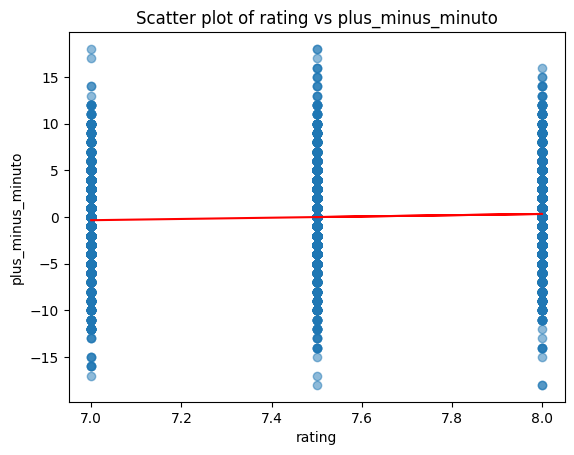

Slope: 0.6712280585852481
Intercept: -5.050725281190627


In [ ]:
# Extract data
x = impactoRating['rating']
y = impactoRating['plus_minus_minuto']

# Calculate the regression line's slope and intercept
slope, intercept = np.polyfit(x, y, 1)

# Plot the scatter plot
plt.scatter(x, y, alpha=0.5)

# Plot the regression line
plt.plot(x, slope*x + intercept, color='red')

# Set titles and labels
plt.title('Scatter plot of rating vs plus_minus_minuto')
plt.xlabel('rating')
plt.ylabel('plus_minus_minuto')

plt.show()

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")

<center>
    <h2>Predictive analytics</h2>
    <hr>
</center>

## Regresión lineal

\begin{align}
    y_{i} &= \alpha  + \sum_{j} \beta_{j} X_{ij} + \epsilon_i  \\
    \epsilon_i &\sim N(0, \sigma^2)
\end{align}

\begin{align}
X_{ij} = \begin{cases}
    1,  &\text{if jugador } j \text{ juega en el equipo local en el periodo } i \\
    -1,  &\text{if player } j \text{ juega en el equipo visitante en el periodo } i\\
    0,  &\text{otherwise.}
\end{cases}
\end{align}

## Predictive analytics (i)

Regresiones

In [ ]:
import statsmodels.api as sm

In [ ]:
# List all columns that we want to check
cols_to_check = ['local1', 'local2', 'local3', 'local4', 'visitante1', 'visitante2', 'visitante3', 'visitante4']

# Get unique player names from those columns
unique_players = periodos[cols_to_check].stack().unique()

# Initialize a dataframe with zeros
X = pd.DataFrame(0, index=periodos.index, columns=unique_players)

# Fill the dataframe based on the described logic
for col in cols_to_check:
    if 'local' in col:
        for index, player in periodos[col].items():
            X.loc[index, player] = 1
    else:
        for index, player in periodos[col].items():
            X.loc[index, player] = -1

# Add a constant (intercept) to the X dataframe
X = sm.add_constant(X)

# Create response vector
y = periodos['local_plus_minus_minuto']

# Conduct the OLS regression
model = sm.OLS(y, X).fit()

# Print the summary
print(model.summary())


                               OLS Regression Results                              
Dep. Variable:     local_plus_minus_minuto   R-squared:                       0.177
Model:                                 OLS   Adj. R-squared:                  0.161
Method:                      Least Squares   F-statistic:                     10.96
Date:                     Tue, 07 Nov 2023   Prob (F-statistic):          1.47e-211
Time:                             19:03:09   Log-Likelihood:                -13154.
No. Observations:                     7448   AIC:                         2.660e+04
Df Residuals:                         7304   BIC:                         2.759e+04
Df Model:                              143                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
# Using the previously generated predictors (X) and response (y):

# Define weights for the WLS model
weights = periodos['minutos']

# Conduct the WLS regression
model_wls = sm.WLS(y, X, weights=weights).fit()

# Print the summary
print(model_wls.summary())

                               WLS Regression Results                              
Dep. Variable:     local_plus_minus_minuto   R-squared:                       0.289
Model:                                 WLS   Adj. R-squared:                  0.275
Method:                      Least Squares   F-statistic:                     20.76
Date:                     Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                             19:03:09   Log-Likelihood:                -11521.
No. Observations:                     7448   AIC:                         2.333e+04
Df Residuals:                         7304   BIC:                         2.432e+04
Df Model:                              143                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [ ]:
# Drop the column 'Marruecos_p5' from the predictors
Xd = X.drop(columns=['Marruecos_p5'])

# OLS Regression
model_ols = sm.OLS(y, Xd).fit()
print("OLS Regression Summary:")
print(model_ols.summary())

OLS Regression Summary:
                               OLS Regression Results                              
Dep. Variable:     local_plus_minus_minuto   R-squared:                       0.177
Model:                                 OLS   Adj. R-squared:                  0.161
Method:                      Least Squares   F-statistic:                     10.96
Date:                     Tue, 07 Nov 2023   Prob (F-statistic):          1.47e-211
Time:                             19:03:10   Log-Likelihood:                -13154.
No. Observations:                     7448   AIC:                         2.660e+04
Df Residuals:                         7304   BIC:                         2.759e+04
Df Model:                              143                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [ ]:
# WLS Regression with weights
weights = periodos['minutos']

# Conduct the WLS regression
model_wls = sm.WLS(y, Xd, weights=weights).fit()

# Print the summary
print(model_wls.summary())

                               WLS Regression Results                              
Dep. Variable:     local_plus_minus_minuto   R-squared:                       0.289
Model:                                 WLS   Adj. R-squared:                  0.275
Method:                      Least Squares   F-statistic:                     20.76
Date:                     Tue, 07 Nov 2023   Prob (F-statistic):               0.00
Time:                             19:03:10   Log-Likelihood:                -11521.
No. Observations:                     7448   AIC:                         2.333e+04
Df Residuals:                         7304   BIC:                         2.432e+04
Df Model:                              143                                         
Covariance Type:                 nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

## Predictive analytics (ii)

Analicemos los resultados de la regresión

In [ ]:
# Initialize a new column 'beta' with zeros
jugadores['beta'] = 0.0

# Iterate over each row in 'jugadores' and assign the corresponding coefficient
for idx, row in jugadores.iterrows():
    if row['jugador'] in model_wls.params:
        jugadores.at[idx, 'beta'] = model_wls.params[row['jugador']]
    elif row['jugador'] == 'Marruecos_p5':
        jugadores.at[idx, 'beta'] = 0

In [ ]:
num_rows = jugadores[jugadores['beta'] < 0.0001].shape[0]
print(num_rows)

1


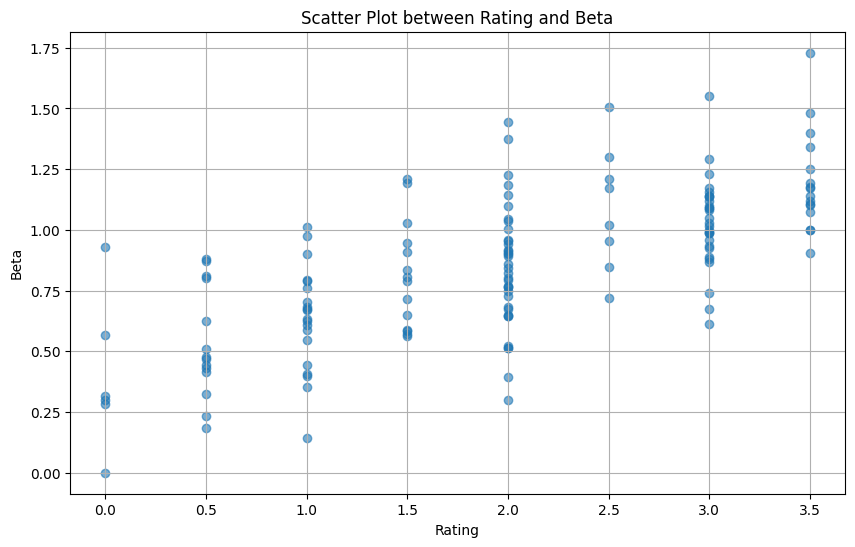

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(jugadores['rating'], jugadores['beta'], alpha=0.6)
plt.title('Scatter Plot between Rating and Beta')
plt.xlabel('Rating')
plt.ylabel('Beta')
plt.grid(True)


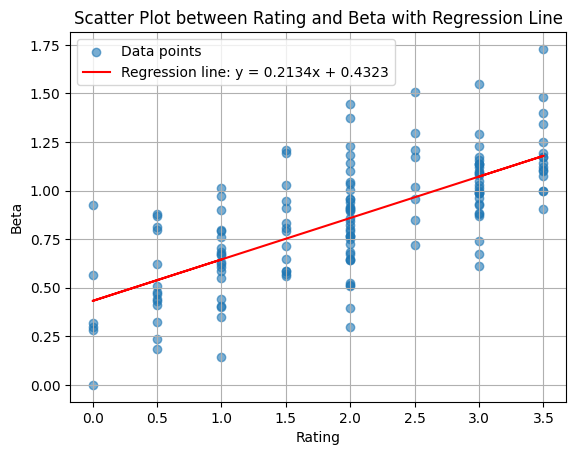

In [ ]:
plt.scatter(jugadores['rating'], jugadores['beta'], alpha=0.6, label="Data points")

# Linear regression
m, b = np.polyfit(jugadores['rating'], jugadores['beta'], 1) # m = slope, b = intercept
plt.plot(jugadores['rating'], m * jugadores['rating'] + b, '-r', label=f'Regression line: y = {m:.4f}x + {b:.4f}')

plt.title('Scatter Plot between Rating and Beta with Regression Line')
plt.xlabel('Rating')
plt.ylabel('Beta')
plt.legend()
plt.grid(True)

In [ ]:
# Extract the confidence intervals from the regression results
conf_intervals = model_wls.conf_int()

# Add the 'lower' and 'upper' columns to the 'jugadores' dataframe
jugadores['lower'] = jugadores['jugador'].map(conf_intervals[0]).fillna(0)
jugadores['upper'] = jugadores['jugador'].map(conf_intervals[1]).fillna(0)

# Note: Players not found in the regression results (e.g., 'Marruecos_p5') will have confidence intervals set to 0 by using `fillna(0)`.

In [ ]:
print(jugadores.head())

  jugador  rating ratingCategoria equipo      minutos  plus_minus  \
0  USA_p1     3.0             3.0    USA  1155.774143         458   
1  USA_p2     3.0             3.0    USA  1067.953325          65   
2  USA_p3     3.5             3.5    USA   888.478357         265   
3  USA_p4     0.0             0.0    USA  1421.401843          94   
4  USA_p5     2.0             2.0    USA  1039.289768         250   

   plus_minus_minuto      beta     lower     upper  
0           0.396271  1.171068  0.823819  1.518317  
1           0.060864  0.867345  0.520808  1.213882  
2           0.298263  1.174459  0.793360  1.555557  
3           0.066132  0.297887 -0.105413  0.701188  
4           0.240549  0.644490  0.333889  0.955090  


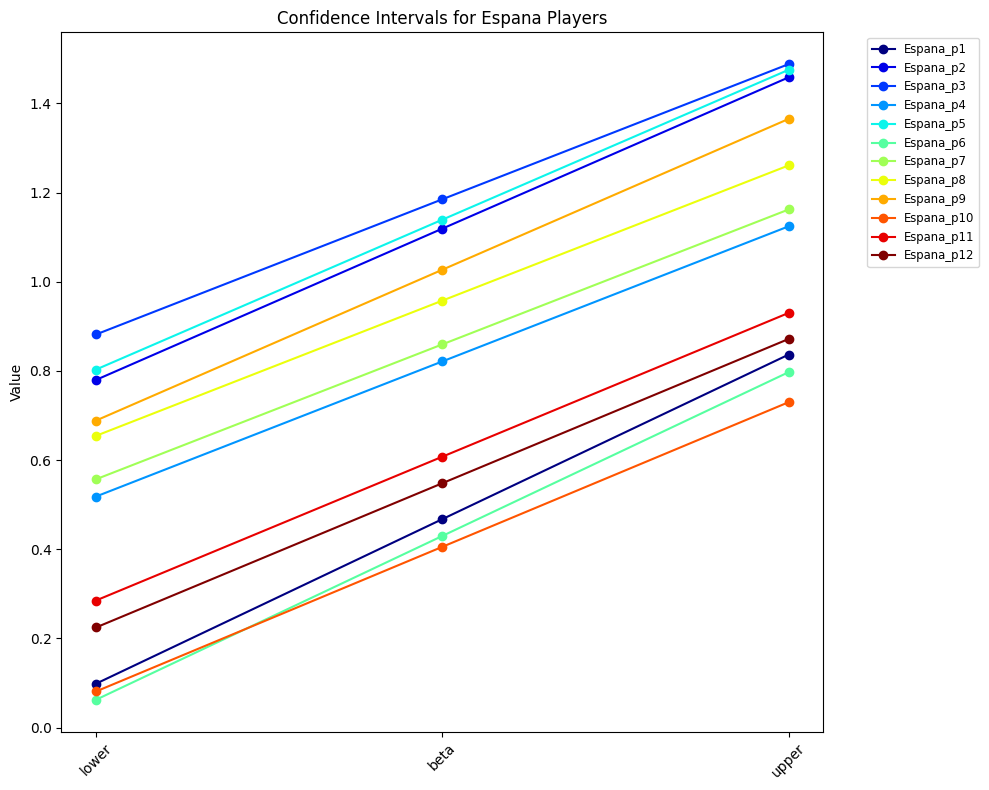

In [ ]:
# Filter for players from "Espana"
espana_players = jugadores[jugadores['equipo'] == 'Espana']

# Generate a unique list of colors for the players
colors = plt.cm.jet(np.linspace(0, 1, len(espana_players)))

# Create the plot
plt.figure(figsize=(10, 8))

# For each player, draw a line connecting the lower, beta, and upper values
for idx, (i, row) in enumerate(espana_players.iterrows()):
    plt.plot(['lower', 'beta', 'upper'], [row['lower'], row['beta'], row['upper']], marker='o', color=colors[idx], label=row['jugador'])

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize='small')
plt.title('Confidence Intervals for Espana Players')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()


<center>
    <h2>Prescriptive analytics</h2>
    <hr>
</center>

In [ ]:
espana=jugadores[jugadores["equipo"]=="Espana"]
print(espana)

        jugador  rating ratingCategoria  equipo      minutos  plus_minus  \
96    Espana_p1     0.5             0.5  Espana   584.500746          19   
97    Espana_p2     3.0             3.0  Espana  1255.905263          -7   
98    Espana_p3     2.0             2.0  Espana  1356.197528         289   
99    Espana_p4     2.0             2.0  Espana  1308.263859         -39   
100   Espana_p5     3.0             3.0  Espana  1356.377810           2   
101   Espana_p6     0.5             0.5  Espana   585.270056          -5   
102   Espana_p7     2.0             2.0  Espana  1346.455740         -17   
103   Espana_p8     2.0             2.0  Espana  1256.240714          76   
104   Espana_p9     3.0             3.0  Espana  1294.767122         -86   
105  Espana_p10     1.0             1.0  Espana  1174.746858        -187   
106  Espana_p11     1.0             1.0  Espana  1333.463457         -66   
107  Espana_p12     1.0             1.0  Espana  1275.810848         -47   

     plus_m

## Modelo simple

\begin{align}
        \textrm{maximize} \quad   & \sum_{j} \beta_j x_j  \\
        \textrm{subject to} \quad  & \sum_{j} w_jx_j \leq 8\\
              & \sum_{j} x_j = 4\\
              & x_j \in \{0,1\}, \quad \forall j.
\end{align}

In [ ]:
from mip import *

In [ ]:
m=Model()
jugadores=12
contribucion=espana["beta"].to_list()
print("contribucion:",contribucion)
ratings=espana["rating"].to_list()
print("rating:",ratings)

x=[m.add_var(var_type=BINARY) for i in range(jugadores)]
m.objective=maximize(xsum(contribucion[i]*x[i] for i in range(jugadores)))
m.add_constr( xsum(ratings[i]*x[i] for i in range(jugadores))<=8 )
m.add_constr( xsum(x[i] for i in range(jugadores))==4 )

status=m.optimize()
print("\n\n")
print(status)
print("aporte esperado",m.objective_value)
for i in range(jugadores):
    if x[i].x>0.5:
        print(i,x[i].x,ratings[i])

contribucion: [0.46749159420302855, 1.119147868108141, 1.1849700258989873, 0.8212830043035111, 1.1392510815440888, 0.42977825605278935, 0.8595323051068653, 0.9576617086647992, 1.0269561969920369, 0.4053934861372934, 0.6075604463584514, 0.5480903675924577]
rating: [0.5, 3.0, 2.0, 2.0, 3.0, 0.5, 2.0, 2.0, 3.0, 1.0, 1.0, 1.0]



OptimizationStatus.OPTIMAL
aporte esperado 3.889443262466327
2 1.0 2.0
4 1.0 3.0
7 1.0 2.0
10 1.0 1.0


## Modelo con mínimo y máximo número de horas

\begin{align}
        \textrm{maximize} \quad   & \sum_{j} \sum_{m} \beta_j x_{mj}  \\
        \textrm{subject to} \quad  & \sum_{j \in R} w_jx_{mj} \leq 8,\quad \forall m \\
              & \sum_{j} x_{mj} = 4,\quad \forall m\\
              & \sum_{m} x_{mj} \geq min_j,\quad \forall j\\
              & \sum_{m} x_{mj} \leq max_j,\quad \forall j\\
              & x_{mj} \in \{0,1\}, \quad \forall m,j.
\end{align}

In [ ]:
m=Model()
jugadores=12
tiempo=32
contribucion=espana["beta"].to_list()
ratings=espana["rating"].to_list()
minimos=[1,3,1,1,4,1,1,5,1,1,1,1]
maximos=[22,12,12,12,12,12,21,12,12,17,12,12]

x=[[m.add_var(var_type=BINARY) for i in range(jugadores)] for t in range(tiempo)]

m.objective=maximize(xsum(contribucion[i]*x[t][i] for i in range(jugadores) for t in range(tiempo)))
for t in range(tiempo):
    m.add_constr( xsum(ratings[i]*x[t][i] for i in range(jugadores))<=8 )
    m.add_constr( xsum(x[t][i] for i in range(jugadores))==4 )
for i in range(jugadores):
    m.add_constr( xsum(x[t][i] for t in range(tiempo))>=minimos[i])
for i in range(jugadores):
    m.add_constr( xsum(x[t][i] for t in range(tiempo))<=maximos[i])

status=m.optimize(max_seconds=120)
print(status)
print(m.objective_value)
for i in range(jugadores):
    print("jugador",i,"contribución:",contribucion[i],"rating:",ratings[i],"minutos: ",end=" ")
    for t in range(tiempo):
        if x[t][i].x>0.5:
            print(t,end=" ")
    print()

OptimizationStatus.FEASIBLE
111.59803148071067
jugador 0 contribución: 0.46749159420302855 rating: 0.5 minutos:  0 5 6 9 10 17 21 22 23 27 
jugador 1 contribución: 1.119147868108141 rating: 3.0 minutos:  0 4 6 7 10 13 16 17 18 22 23 27 
jugador 2 contribución: 1.1849700258989873 rating: 2.0 minutos:  1 7 8 9 11 12 14 16 17 26 28 29 
jugador 3 contribución: 0.8212830043035111 rating: 2.0 minutos:  0 7 10 11 13 14 15 19 21 24 25 
jugador 4 contribución: 1.1392510815440888 rating: 3.0 minutos:  2 5 8 18 19 22 24 25 26 29 30 31 
jugador 5 contribución: 0.42977825605278935 rating: 0.5 minutos:  7 
jugador 6 contribución: 0.8595323051068653 rating: 2.0 minutos:  1 2 3 4 6 8 9 10 12 13 15 16 19 20 23 24 25 26 27 29 30 
jugador 7 contribución: 0.9576617086647992 rating: 2.0 minutos:  0 2 3 4 6 17 20 21 23 27 28 30 
jugador 8 contribución: 1.0269561969920369 rating: 3.0 minutos:  1 3 5 9 11 12 14 15 20 21 28 31 
jugador 9 contribución: 0.4053934861372934 rating: 1.0 minutos:  31 
jugador 10 con

## Modelo evitando cambios innecesarios

\begin{align}
        \textrm{maximize} \quad   & \sum_{j} \sum_{m} \beta_j x_{mj} - \sum_{j} \sum_{m:m<32} \epsilon c_{jm}  \\
        \textrm{subject to} \quad  & \sum_{j \in R} w_jx_{mj} \leq 8,\quad \forall m \\
              & \sum_{j} x_{mj} = 4,\quad \forall m\\
              & \sum_{m} x_{mj} \geq min_j,\quad \forall j\\
              & \sum_{m} x_{mj} \leq max_j,\quad \forall j\\
              & x_{mj} + c_{mj} \geq x_{m+1,j},\quad \forall m:m<32 \\
              & x_{mj} \in \{0,1\}, \quad \forall m,j.
\end{align}

In [ ]:
m=Model()
jugadores=12
tiempo=32
beneficios=espana["beta"].to_list()
ratings=espana["rating"].to_list()
minimos=[1,3,1,1,4,1,1,5,1,1,1,1]
maximos=[22,12,12,12,12,12,21,12,12,17,12,12]

x=[[m.add_var(var_type=BINARY) for i in range(jugadores)] for t in range(tiempo)]
cambios=[[m.add_var() for i in range(jugadores)] for t in range(tiempo)]

m.objective=maximize(xsum(1000*beneficios[i]*x[t][i] for i in range(jugadores) for t in range(tiempo)) - xsum(1.0*cambios[t][i] for i in range(jugadores) for t in range(tiempo))  )
for t in range(tiempo):
    m.add_constr( xsum(ratings[i]*x[t][i] for i in range(jugadores))<=8 )
    m.add_constr( xsum(x[t][i] for i in range(jugadores))==4 )
for i in range(jugadores):
    m.add_constr( xsum(x[t][i] for t in range(tiempo))>=minimos[i])
for i in range(jugadores):
    m.add_constr( xsum(x[t][i] for t in range(tiempo))<=maximos[i])
for t in range(tiempo-1):
    for i in range(jugadores):
        m.add_constr( x[t][i]+cambios[t][i]>=x[t+1][i])


In [ ]:
status=m.optimize(max_seconds=120)
print(status)

print(m.objective_value)
for i in range(jugadores):
    print("jugador",i,"beneficio:",beneficios[i],"rating:",ratings[i],"minutos: ",end=" ")
    for t in range(tiempo):
        if x[t][i].x>0.5:
            print(t,end=" ")
    print()

OptimizationStatus.FEASIBLE
111575.03148071072
jugador 0 beneficio: 0.46749159420302855 rating: 0.5 minutos:  7 8 12 13 14 15 16 25 26 31 
jugador 1 beneficio: 1.119147868108141 rating: 3.0 minutos:  17 18 19 20 21 22 23 24 25 26 27 31 
jugador 2 beneficio: 1.1849700258989873 rating: 2.0 minutos:  0 12 13 14 15 16 17 18 19 20 21 22 
jugador 3 beneficio: 0.8212830043035111 rating: 2.0 minutos:  1 2 3 4 5 6 7 10 11 12 13 
jugador 4 beneficio: 1.1392510815440888 rating: 3.0 minutos:  0 1 2 3 4 5 6 7 8 9 10 11 
jugador 5 beneficio: 0.42977825605278935 rating: 0.5 minutos:  27 
jugador 6 beneficio: 0.8595323051068653 rating: 2.0 minutos:  0 1 2 3 4 5 6 7 8 9 10 11 14 15 16 17 23 24 28 29 30 
jugador 7 beneficio: 0.9576617086647992 rating: 2.0 minutos:  8 9 18 19 20 21 22 23 24 28 29 30 
jugador 8 beneficio: 1.0269561969920369 rating: 3.0 minutos:  12 13 14 15 16 25 26 27 28 29 30 31 
jugador 9 beneficio: 0.4053934861372934 rating: 1.0 minutos:  27 
jugador 10 beneficio: 0.6075604463584514 r

## Modelo con beneficio cambiante con el tiempo activo

In [ ]:
m=Model()
jugadores=12
tiempo=32
beneficios=espana["beta"].to_list()
ratings=espana["rating"].to_list()
minimos=[1,3,1,1,4,1,1,5,1,1,1,1]
maximos=[30,30,30,30,30,30,30,30,30,30,30,30]
multiplicador=[1.25,1,0.75,0.5]
limiteTramo=[6,6,12,12]
x=[[m.add_var(var_type=BINARY) for i in range(jugadores)] for t in range(tiempo)]
cambios=[[m.add_var() for i in range(jugadores)] for t in range(tiempo)]
tiempoTramos=[[m.add_var() for i in range(jugadores)] for tr in range(4)]

m.objective=maximize(xsum(1000*beneficios[i]*multiplicador[tr]*tiempoTramos[tr][i] for i in range(jugadores) for tr in range(4)) - xsum(1.0*cambios[t][i] for i in range(jugadores) for t in range(tiempo))  )
for t in range(tiempo):
    m.add_constr( xsum(ratings[i]*x[t][i] for i in range(jugadores))<=8 )
    m.add_constr( xsum(x[t][i] for i in range(jugadores))==4 )
for i in range(jugadores):
    m.add_constr( xsum(x[t][i] for t in range(tiempo))>=minimos[i])
for i in range(jugadores):
    m.add_constr( xsum(x[t][i] for t in range(tiempo))<=maximos[i])
for t in range(tiempo-1):
    for i in range(jugadores):
        m.add_constr( x[t][i]+cambios[t][i]>=x[t+1][i])
for i in range(jugadores):
    m.add_constr( xsum(tiempoTramos[tr][i] for tr in range(4)) <= xsum(x[t][i] for t in range(tiempo)) )
for tr in range(4):
    for i in range(jugadores):
        m.add_constr(tiempoTramos[tr][i]<=limiteTramo[tr])

In [ ]:
status=m.optimize(max_seconds=120)
print(status)

OptimizationStatus.FEASIBLE


In [ ]:
print(m.objective_value)
for i in range(jugadores):
    print("jugador",i,"beneficio:",beneficios[i],"rating:",ratings[i],"minutos: ",end=" ")
    for t in range(tiempo):
        if x[t][i].x>0.5:
            print(t,end=" ")
    print()
for i in range(jugadores):
    print("jugador",i,end=" ")
    for tr in range(4):
        print("tr",tr,"valor",tiempoTramos[tr][i].x)

125774.53067518516
jugador 0 beneficio: 0.46749159420302855 rating: 0.5 minutos:  2 3 21 22 23 24 
jugador 1 beneficio: 1.119147868108141 rating: 3.0 minutos:  4 5 6 7 8 9 10 11 12 13 29 30 
jugador 2 beneficio: 1.1849700258989873 rating: 2.0 minutos:  0 8 9 10 11 12 13 14 15 16 17 18 19 20 21 23 24 25 26 27 28 29 30 31 
jugador 3 beneficio: 0.8212830043035111 rating: 2.0 minutos:  0 1 2 3 4 7 17 18 19 20 21 22 
jugador 4 beneficio: 1.1392510815440888 rating: 3.0 minutos:  17 18 20 21 22 23 24 25 26 27 28 31 
jugador 5 beneficio: 0.42977825605278935 rating: 0.5 minutos:  4 7 30 
jugador 6 beneficio: 0.8595323051068653 rating: 2.0 minutos:  7 8 9 10 11 12 13 14 15 16 23 24 
jugador 7 beneficio: 0.9576617086647992 rating: 2.0 minutos:  1 2 3 4 22 25 26 27 28 29 30 31 
jugador 8 beneficio: 1.0269561969920369 rating: 3.0 minutos:  0 1 2 3 5 6 14 15 16 19 
jugador 9 beneficio: 0.4053934861372934 rating: 1.0 minutos:  29 
jugador 10 beneficio: 0.6075604463584514 rating: 1.0 minutos:  0 1 5 6